##  Machine Failure Dataset Project

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train Dataset

In [3]:
import pandas as pd
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Check missing values train Dataset

In [6]:
df.isna().sum()



id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Seperate X and Y 

In [7]:
X = df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

### Cat Con Seperation for X

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Type']

In [10]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create a feature selection pipeline
Cat - OrdinalEncoding

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)])

In [13]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [14]:
cols=pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [15]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### Feature selection with Mutual Information scores

In [16]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00522762, 0.00222204, 0.01943034, 0.01960099, 0.00708507,
       0.00785902, 0.02449197, 0.0111841 , 0.01977998, 0.00118567,
       0.01198859])

In [17]:
mi=pd.Series(mi)
mi.index=X_pre.columns
mi=mi.sort_values(ascending=False)
mi

num__HDF                        0.024492
num__OSF                        0.019780
num__Torque [Nm]                0.019601
num__Rotational speed [rpm]     0.019430
cat__Type                       0.011989
num__PWF                        0.011184
num__TWF                        0.007859
num__Tool wear [min]            0.007085
num__Air temperature [K]        0.005228
num__Process temperature [K]    0.002222
num__RNF                        0.001186
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

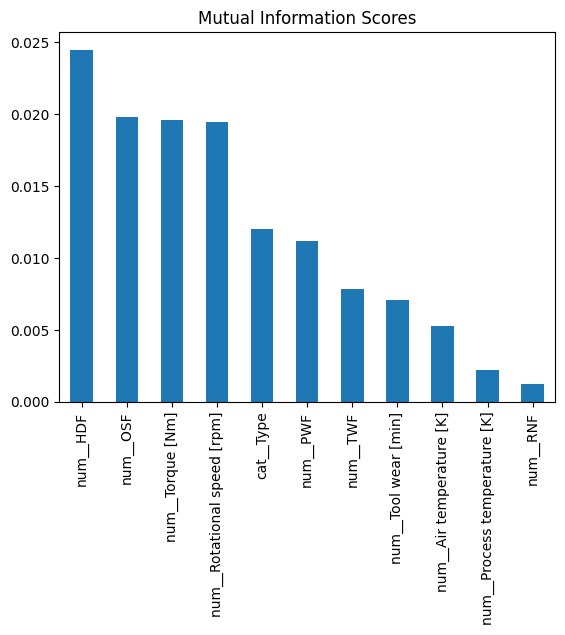

In [18]:
mi.plot(kind='bar', title='Mutual Information Scores')

### Create a final pipeline

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con),
                          ('cat', cat_pipe2, cat)])

In [21]:
X_pre2 = pre2.fit_transform(X)
X_pre2

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [22]:
final_cols=pre2.get_feature_names_out()
final_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [23]:
X_pre2 = pd.DataFrame(X_pre2, columns=final_cols)
X_pre2.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### train test split

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre2, Y, test_size=0.2, random_state=42)

In [25]:
xtrain.shape

(109143, 13)

In [26]:
xtest.shape

(27286, 13)

### Algo Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [28]:
dict = {'Logistic': LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()}

In [29]:
dict.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [30]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name,model in dict.items():
    # Fit the model
    model.fit(xtrain,ytrain)
    
    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    
    #1. Calculate F1 score in training
    f1_tr = f1_score(ytrain,ypred_tr)
    tr.append(f1_tr)

    #2. Calculate F1 Score in train Cross validated
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)

    #3. Calculate F1 score in testing
    f1_ts = f1_score(ytest,ypred_ts)
    ts.append(f1_ts)

    # Print the result for model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}\n')
    print(f'training F1 Cross Validated : {f1_cv:.4f}\n')
    print(f'Testing F1 : {f1_ts:.4f}')
    print('\n***************************************\n')



Model Name : Logistic

Training F1 : 0.8625

training F1 Cross Validated : 0.8622

Testing F1 : 0.8649

***************************************

Model Name : Decision Tree

Training F1 : 0.9950

training F1 Cross Validated : 0.7475

Testing F1 : 0.7670

***************************************

Model Name : Random Forest

Training F1 : 0.9950

training F1 Cross Validated : 0.8573

Testing F1 : 0.8630

***************************************

Model Name : Gradient Boost

Training F1 : 0.8732

training F1 Cross Validated : 0.8592

Testing F1 : 0.8637

***************************************



### Create a dataframe to show results

In [31]:
dict.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [32]:
eval_dict = {'Model_name':list(dict.keys()),
             'Train F1': tr,
             'Test F1': ts,
             'Train F1 cv':tr_cv}

In [33]:
eval_df = pd.DataFrame(eval_dict)
eval_df.sort_values(by='Test F1',ascending=False)

,Model_name,Train F1,Test F1,Train F1 cv
0,Logistic,0.862525,0.864865,0.862230
3,Gradient Boost,0.873239,0.863694,0.859235
2,Random Forest,0.995019,0.862996,0.857257
1,Decision Tree,0.995007,0.766968,0.747485


### Hyperparameter tune Logistic Regression

In [34]:
params = {'C':[0.01,0.1,1,10,50,100,1000]}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv=RandomizedSearchCV(lr,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 1000]},
                   scoring='f1')

In [36]:
rscv.best_params_

{'C': 0.1}

In [37]:
rscv.best_score_

0.862513786746223

In [38]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.1)

### Evaluate accuracy in train and test

In [39]:
best_lr.score(xtrain,ytrain)

0.9961976489559569

In [40]:
best_lr.score(xtest, ytest)

0.9961518727552591

### Predict results in train and test

In [41]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [42]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [43]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [44]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [45]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Create a confusion matrix for test

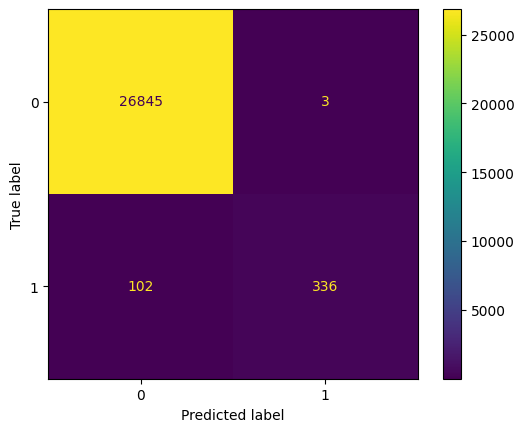

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Check classification report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Plotting ROC - AUC curve in train and test

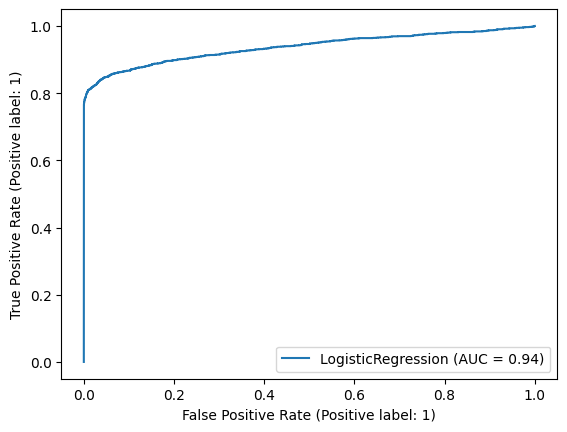

In [48]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)

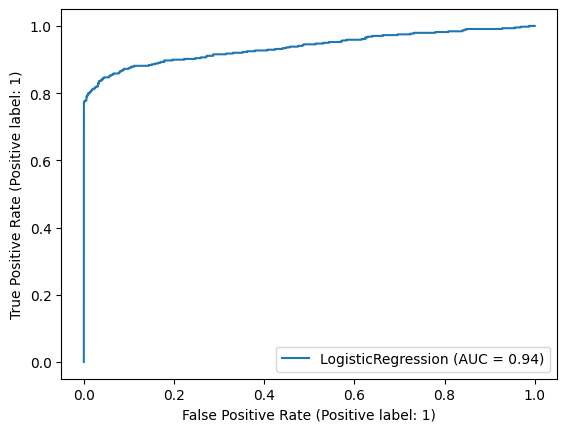

In [49]:

RocCurveDisplay.from_estimator(best_lr,xtest,ytest)

#### Predict the testing file (Id, Machine Failure, Prob)

In [50]:
xnew1 = pd.read_csv('test.csv')
xnew1.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [51]:
xnew1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


### Check Missing Value

In [52]:
xnew1.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [53]:
xnew_pre = pre2.transform(xnew1)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [54]:
xnew_pre = pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Prediction

In [55]:
pred = best_lr.predict(xnew_pre)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Probability

In [56]:
prob = best_lr.predict_proba(xnew_pre)[:,1]
prob

array([0.00222472, 0.001099  , 0.00270896, ..., 0.00306237, 0.00240547,
       0.00241205])

### Save this predictions in dataframe

In [57]:
df_final = xnew1[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [58]:
df_final['Machine Failure'] = pred
df_final['Prob'] = prob

In [59]:
df_final

,id,Machine Failure,Prob
0,136429,0,0.002225
1,136430,0,0.001099
2,136431,0,0.002709
3,136432,0,0.003088
4,136433,0,0.003862
...,...,...,...
90949,227378,0,0.002335
90950,227379,0,0.000514
90951,227380,0,0.003062
90952,227381,0,0.002405


### Check how many machines failed in testing file.

In [60]:
df_final['Machine Failure'].value_counts()

Machine Failure
0    89849
1     1105
Name: count, dtype: int64

<Axes: xlabel='Machine Failure'>

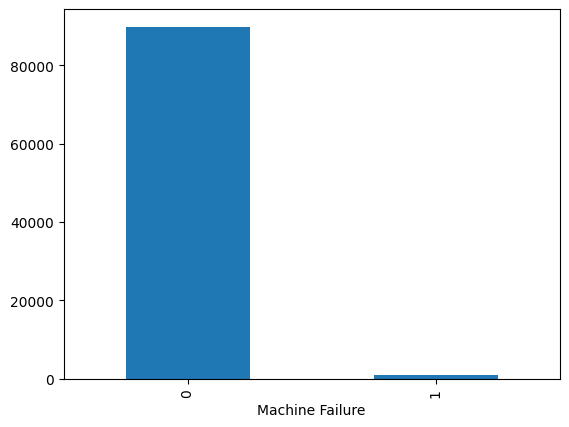

In [61]:
df_final['Machine Failure'].value_counts().plot(kind='bar')

In [63]:
df_final[df_final['Machine Failure']==1]

,id,Machine Failure,Prob
17,136446,1,0.992193
209,136638,1,0.995085
223,136652,1,0.987978
397,136826,1,0.996171
405,136834,1,0.997852
...,...,...,...
90503,226932,1,0.987178
90665,227094,1,0.999689
90679,227108,1,0.683119
90784,227213,1,0.983046


### Save results to csv

In [62]:
df_final.to_csv('Predictions.csv', index=False)